In [1]:
from cStringIO import StringIO
import numpy as np
import svgwrite
import random
import requests

from skimage.draw import line_aa

URL_DATA = {}
URL_DATA['aircraft-carrier-full'] = 'https://storage.googleapis.com/quickdraw_dataset/sketchrnn/aircraft%20carrier.full.npz'
URL_DATA['aircraft-carrier'] = 'https://storage.googleapis.com/quickdraw_dataset/sketchrnn/aircraft%20carrier.npz'
URL_DATA['anvil'] = 'https://storage.googleapis.com/quickdraw_dataset/sketchrnn/anvil.npz'

In [2]:
response = requests.get(URL_DATA['anvil'])
data = np.load(StringIO(response.content))
print data['train'].shape

(70000,)


In [3]:
anvil = data['train'][2] # list of triples (dx, dy, pen_up)

In [10]:
def get_bounds(data):
    min_x, max_x, min_y, max_y = (0, 0, 0, 0)
    abs_x, abs_y = (0, 0)
    for i in range(data.shape[0]):
        dx, dy = data[i, :2]
        abs_x += dx
        abs_y += dy
        min_x = min(min_x, abs_x)
        max_x = max(max_x, abs_x)
        min_y = min(min_y, abs_y)
        max_y = max(max_y, abs_y)
    return (min_x, max_x, min_y, max_y)

min_x, max_x, min_y, max_y = get_bounds(anvil)
dims = (50 + max_x - min_x, 50 + max_y - min_y)
print dims

img = np.zeros(dims, dtype=np.uint8)

abs_x = 25 - min_x
abs_y = 25 - min_y
lift_pen = 1
for i in range(anvil.shape[0]):
    dx, dy = anvil[i, :2]
    if lift_pen == 0:
        rr, cc, val = line_aa(abs_x, abs_y, abs_x + dx, abs_y + dy)
        img[rr, cc] = val * 255
        
    abs_x += dx
    abs_y += dy
    lift_pen = anvil[i, 2]

print img

(308, 193)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


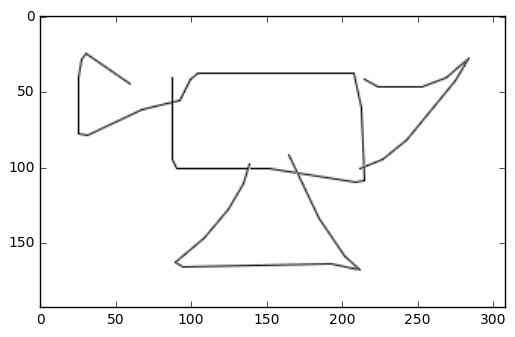

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(255 - img.T, cmap='gray')
plt.show()

In [15]:
anvils = data['train']
anvil_dims = [get_bounds(a) for a in anvils]

In [20]:
anvil_wh = [[x[1]-x[0], x[3]-x[2]] for x in anvil_dims]
anvil_wh = np.array(anvil_wh)

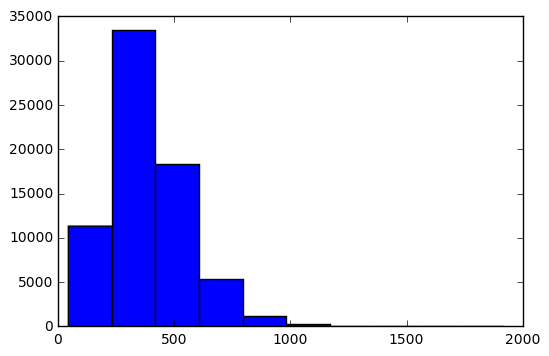

In [23]:
plt.hist(anvil_wh[:, 0])
plt.show()

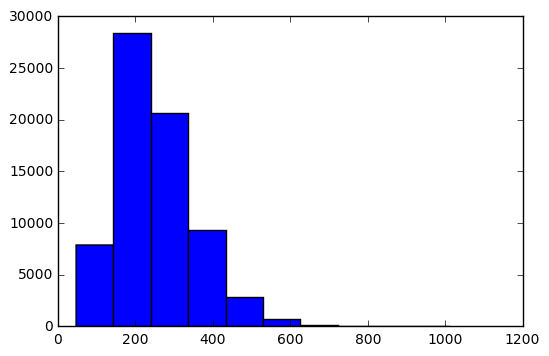

In [24]:
plt.hist(anvil_wh[:, 1])
plt.show()